# Business Problem
**No-Churn Telecom is an establish Telecom operation in Europe with more than a decade in Business. Due to new players in the Market, telecom industry has become very competitive and retaining customers becoming challenge. 
**In spite of No-Churn initiative for reducing tariffs and promoting more offers, the churn rate (percentage of customers migrating to competitors) is well above 10%. 
**No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry. 

# Goal

Help No-Churn with their use cases with ML 
 
1. Understanding the variables that influencing the customers to migrate. 
2. Creating Churn risk scores that can be indicative to drive retention campaigns. 
3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers 
   can be targets to Churn YES customers. 
4. Exporting the trained model with prediction capability for CHURN-FLAG Highlights the flag (with input variables documents) that can be integration with internal application help to identify possible CHURN-FLAG YES customers and 
provide more attention in customer touch point areas, including customercare support, request fulfilment, auto categorizing tickets as high priority for quick resolutions any questions they may have etc.,

Import Libraries


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

In [0]:
#Read the csv file in to a data frame using pandas
no_churn=pd.read_csv('telecom_churn_data.csv')

In [3]:
no_churn.info()
no_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
KS           4616 non-null object
 128         4616 non-null int64
 415         4616 non-null int64
 382-4657    4616 non-null object
 no          4616 non-null object
 yes         4616 non-null object
 25          4616 non-null int64
 265.1       4616 non-null float64
 110         4616 non-null int64
 45.07       4616 non-null float64
 197.4       4616 non-null float64
 99          4616 non-null int64
 16.78       4616 non-null float64
 244.7       4616 non-null float64
 91          4616 non-null int64
 11.01       4616 non-null float64
 10          4616 non-null float64
 3           4616 non-null int64
 2.7         4616 non-null float64
 1           4616 non-null int64
 False.      4616 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 757.4+ KB


KS   128   415   382-4657    no   yes  ...   11.01    10   3   2.7   1   False.
0  OH   107   415   371-7191    no   yes  ...   11.45  13.7   3  3.70   1   False.
1  NJ   137   415   358-1921    no    no  ...    7.32  12.2   5  3.29   0   False.
2  OH    84   408   375-9999   yes    no  ...    8.86   6.6   7  1.78   2   False.
3  OK    75   415   330-6626   yes    no  ...    8.41  10.1   3  2.73   3   False.
4  AL   118   510   391-8027   yes    no  ...    9.18   6.3   6  1.70   0   False.

[5 rows x 21 columns]

In [0]:
#we are going to change the data as required as we have a description of the columns in our pdf
no_churn.columns=['State','Account Length','Area Code','Phone','International Plan','VMail Plan','VMail Message','Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins','Night Calls','Night Charge','International Mins','International calls','International Charge','CustServ Calls','Churn']

In [5]:
no_churn.info()
no_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 21 columns):
State                   4616 non-null object
Account Length          4616 non-null int64
Area Code               4616 non-null int64
Phone                   4616 non-null object
International Plan      4616 non-null object
VMail Plan              4616 non-null object
VMail Message           4616 non-null int64
Day Mins                4616 non-null float64
Day Calls               4616 non-null int64
Day Charge              4616 non-null float64
Eve Mins                4616 non-null float64
Eve Calls               4616 non-null int64
Eve Charge              4616 non-null float64
Night Mins              4616 non-null float64
Night Calls             4616 non-null int64
Night Charge            4616 non-null float64
International Mins      4616 non-null float64
International calls     4616 non-null int64
International Charge    4616 non-null float64
CustServ Calls          4616 non-null

State  Account Length  ...  CustServ Calls    Churn
0    OH             107  ...               1   False.
1    NJ             137  ...               0   False.
2    OH              84  ...               2   False.
3    OK              75  ...               3   False.
4    AL             118  ...               0   False.

[5 rows x 21 columns]

#As there are no missing values in the data we are directly going for some exploratory data 

# Exploratory Data Analysis

Lets Visualize the data with different types of plots and also determine the relation ship between them

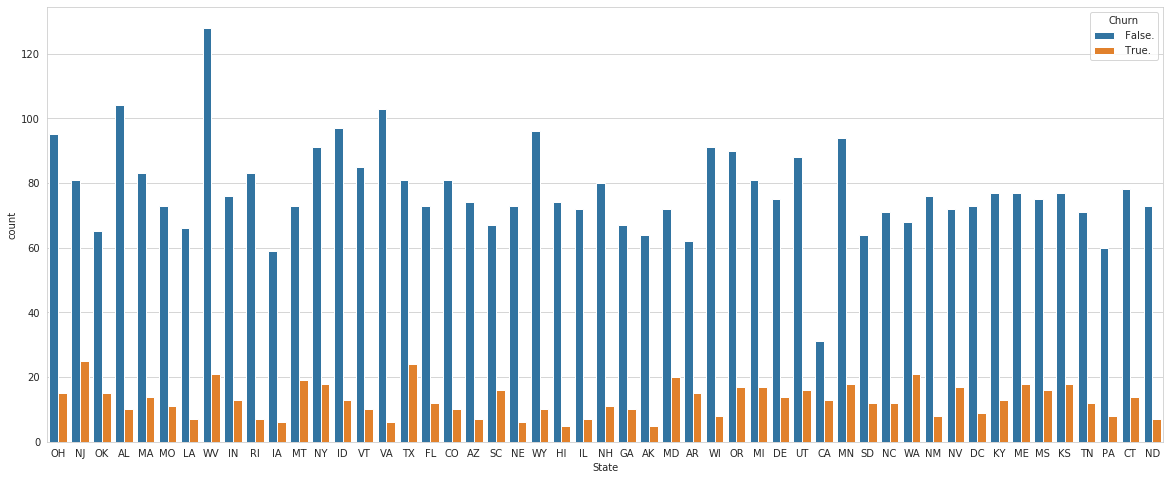

In [6]:
#First lets do some count plots between many categorical columns with respect to the output column
#1.State vs Churn
plt.figure(figsize=(20,8))
sns.countplot('State',hue='Churn',data=no_churn)

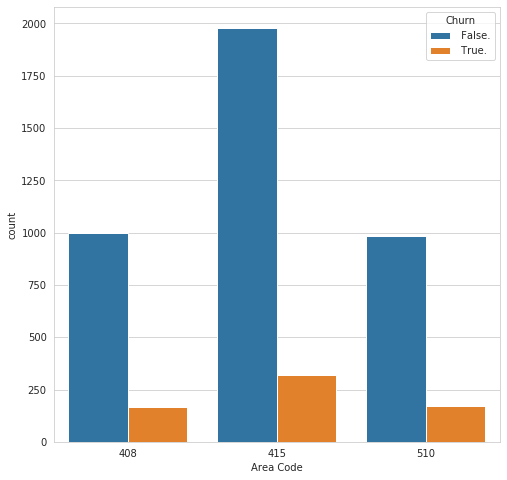

In [7]:
#2. Area Code vs Churn
plt.figure(figsize=(8,8))
sns.countplot('Area Code',hue='Churn',data=no_churn)

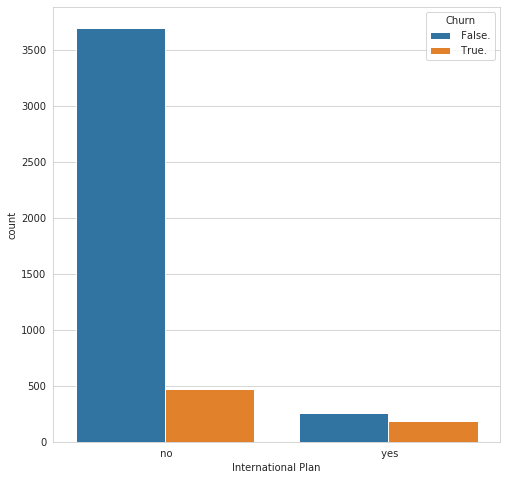

In [8]:
#3. International Plan vs Churn
plt.figure(figsize=(8,8))
sns.countplot('International Plan',hue='Churn',data=no_churn)

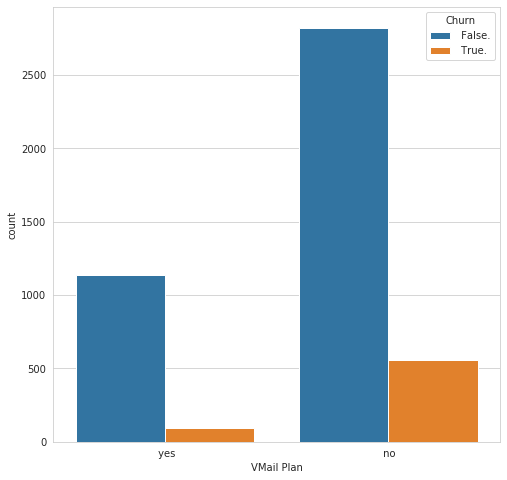

In [9]:
#4.VMail Plan vs Churn
plt.figure(figsize=(8,8))
sns.countplot('VMail Plan',hue='Churn',data=no_churn)

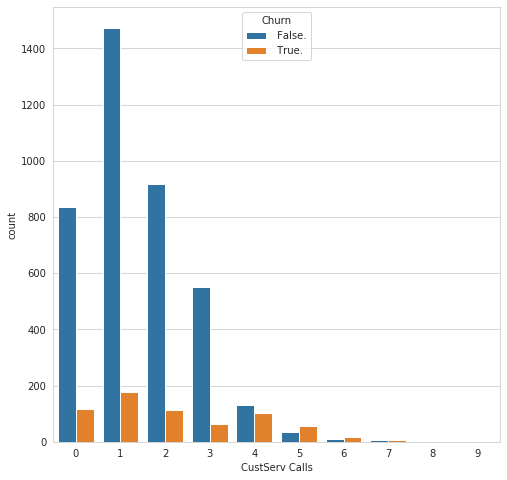

In [10]:
#5. Customer Service calls vs Churn
plt.figure(figsize=(8,8))
sns.countplot('CustServ Calls',hue='Churn',data=no_churn)

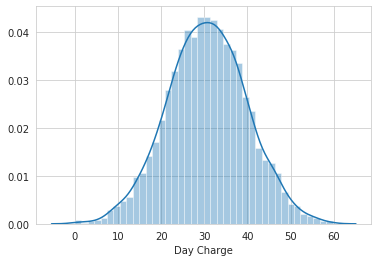

In [11]:
#Lets do some Distplots
sns.distplot(no_churn['Day Charge'],bins=40)

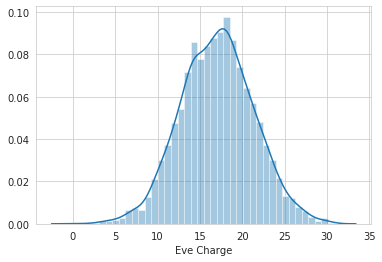

In [12]:
sns.distplot(no_churn['Eve Charge'],bins=40)

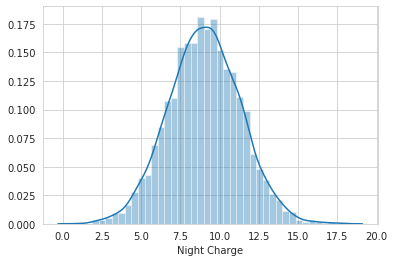

In [13]:
sns.distplot(no_churn['Night Charge'],bins=40)

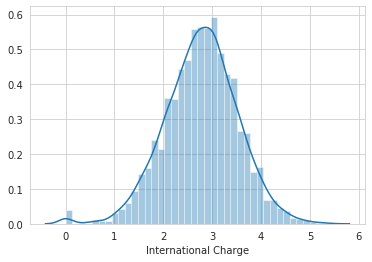

In [14]:
sns.distplot(no_churn['International Charge'],bins=40)

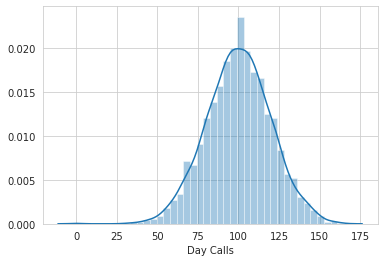

In [15]:
sns.distplot(no_churn['Day Calls'],bins=40)

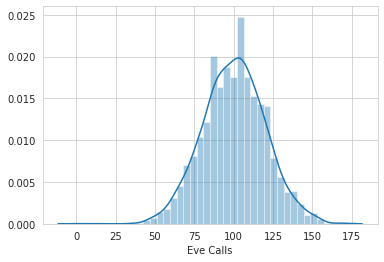

In [16]:
sns.distplot(no_churn['Eve Calls'],bins=40)

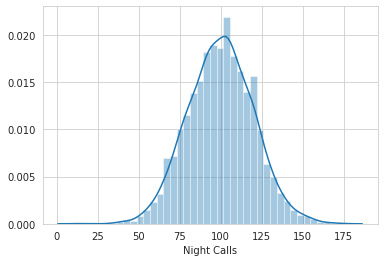

In [17]:
sns.distplot(no_churn['Night Calls'],bins=40)

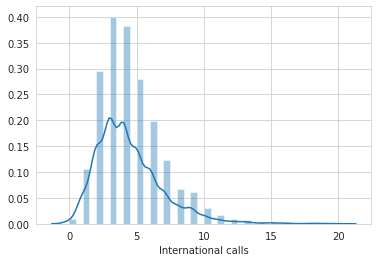

In [18]:
sns.distplot(no_churn['International calls'],bins=40)

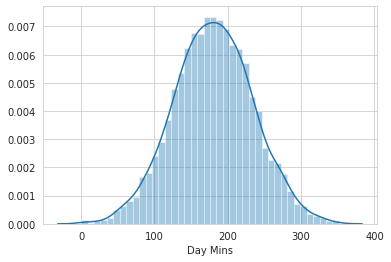

In [19]:
sns.distplot(no_churn['Day Mins'],bins=40)

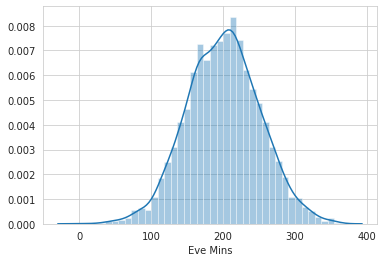

In [20]:
sns.distplot(no_churn['Eve Mins'],bins=40)

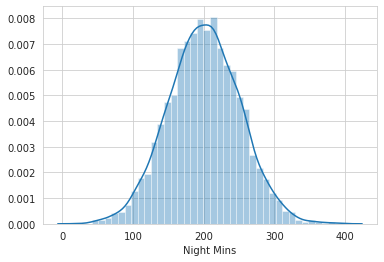

In [21]:
sns.distplot(no_churn['Night Mins'],bins=40)

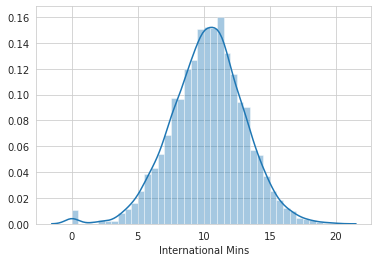

In [22]:
sns.distplot(no_churn['International Mins'],bins=40)

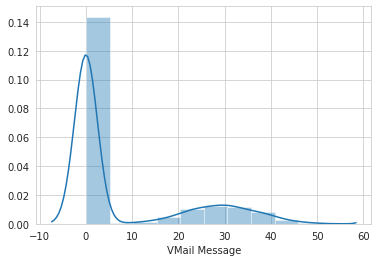

In [23]:
sns.distplot(no_churn['VMail Message'],bins=10)

<Figure size 1440x1440 with 0 Axes>

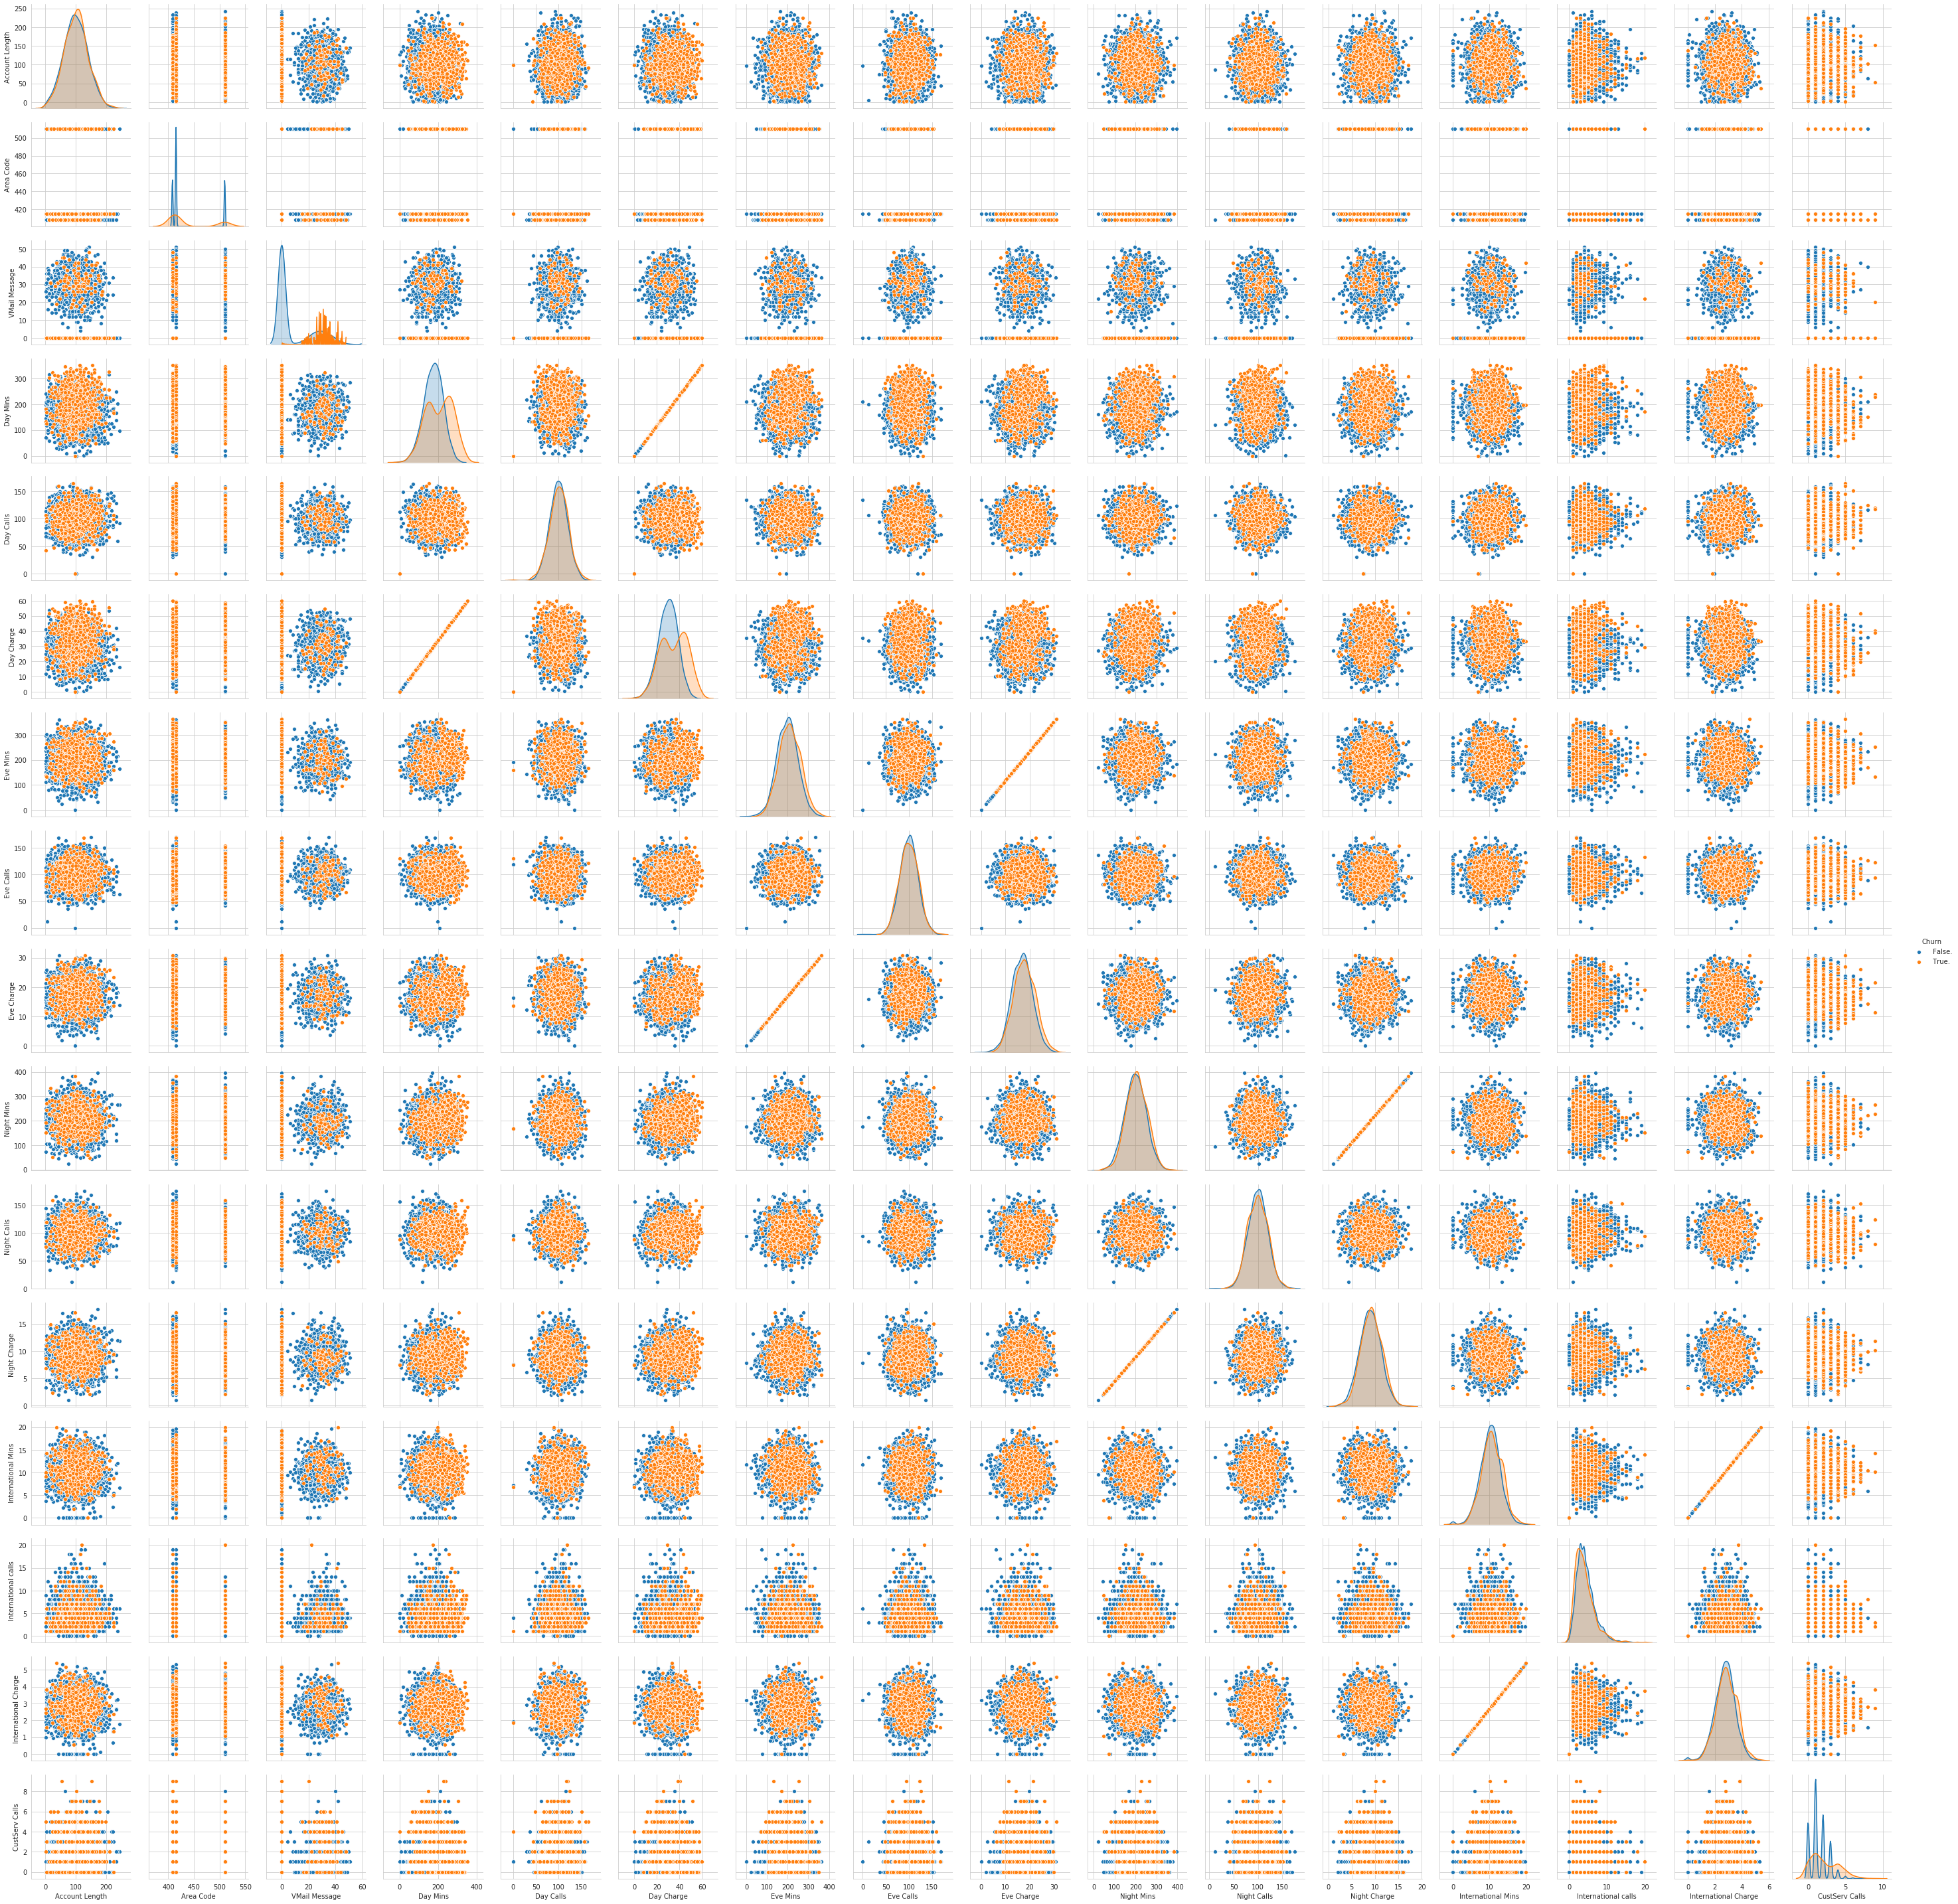

In [24]:
#lets do some Pairplots
plt.figure(figsize=(20,20))
sns.pairplot(no_churn,hue='Churn')

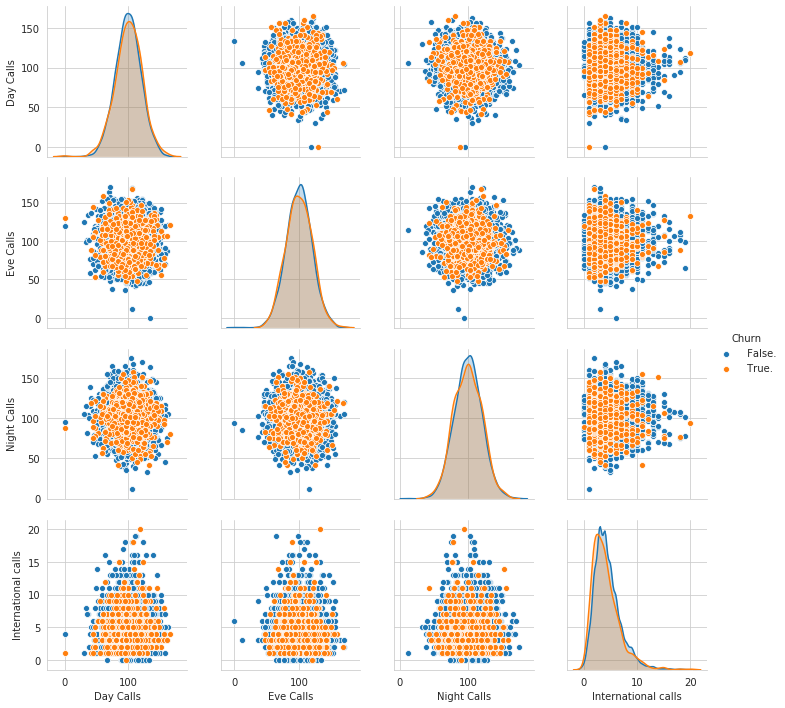

In [25]:
sns.pairplot(no_churn[['Day Calls','Eve Calls','Night Calls','International calls','Churn']],hue='Churn')

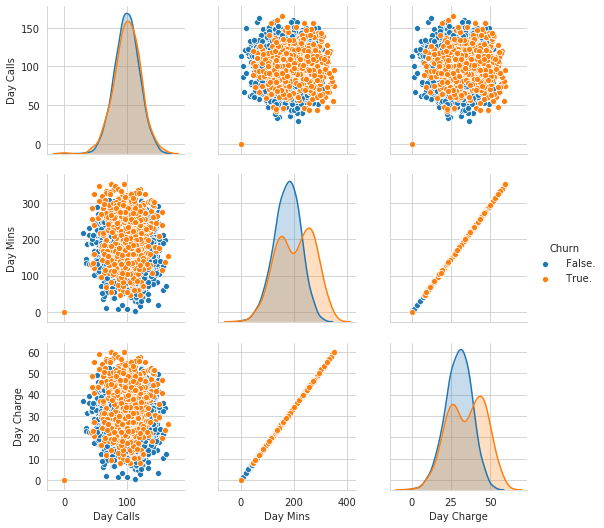

In [26]:
sns.pairplot(no_churn[['Day Calls','Day Mins','Day Charge','Churn']],hue='Churn')

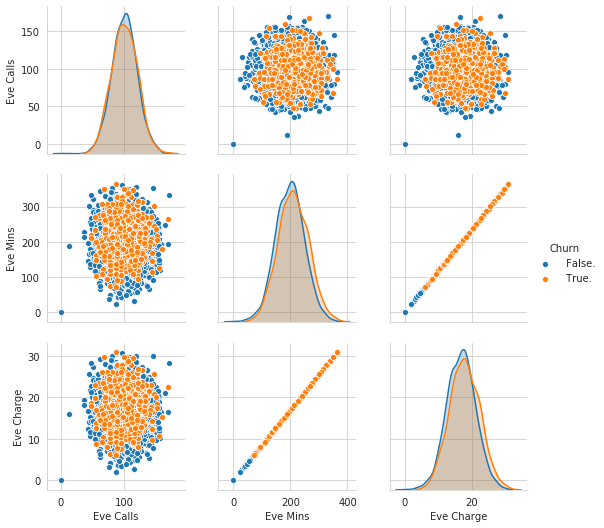

In [27]:
sns.pairplot(no_churn[['Eve Calls','Eve Mins','Eve Charge','Churn']],hue='Churn')

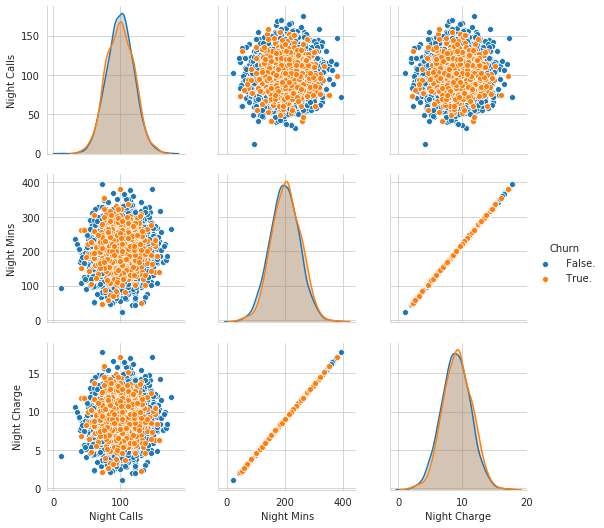

In [28]:
sns.pairplot(no_churn[['Night Calls','Night Mins','Night Charge','Churn']],hue='Churn')

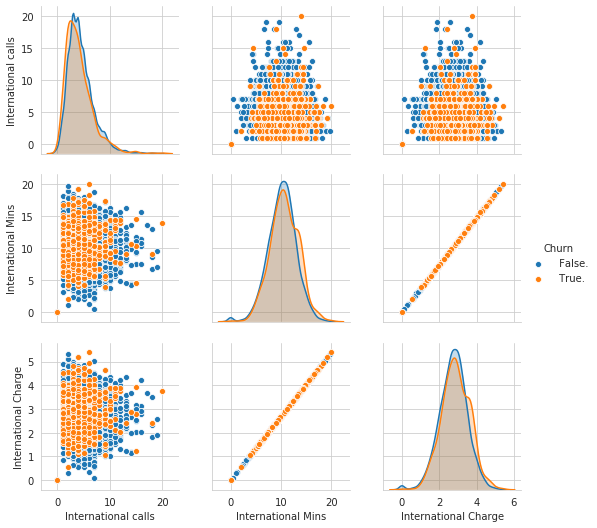

In [29]:
sns.pairplot(no_churn[['International calls','International Mins','International Charge','Churn']],hue='Churn')

In [30]:
no_churn.head()

State  Account Length  ...  CustServ Calls    Churn
0    OH             107  ...               1   False.
1    NJ             137  ...               0   False.
2    OH              84  ...               2   False.
3    OK              75  ...               3   False.
4    AL             118  ...               0   False.

[5 rows x 21 columns]

In [0]:
#Dropping the unnecessary columns
no_churn.drop(['Account Length','Phone'],axis=1,inplace = True)

# Assigining the Input and Output Variables

For Assigining inputs wefirst need to go through a scalar and also encode the categorical values

In [0]:
#Applying Standard Scalar to the required inputs
x=no_churn.drop(['State','Area Code','International Plan',
                 'VMail Plan','CustServ Calls','Churn'],axis=1)   #Store the required inputs to a variable
from sklearn.preprocessing import StandardScaler #import standard scalar
sc=StandardScaler() #define Standard scalar
x=sc.fit_transform(x) # aplly standard scalar on the dataframe
x=pd.DataFrame(x,columns=['VMail Message','Day Mins','Day Calls','Day Charge',#As the transformed values will be in a matrix
                          'Eve Mins','Eve Calls','Eve Charge','Night Mins',   #we convert it into a dataframe   
                          'Night Calls','Night Charge','International Mins',
                          'International calls','International Charge'])

In [33]:
x.head()

VMail Message  Day Mins  ...  International calls  International Charge
0       1.335823 -0.348881  ...            -0.583572              1.241325
1      -0.577351  1.166800  ...             0.230255              0.690555
2      -0.577351  2.204429  ...             1.044083             -1.337891
3      -0.577351 -0.254383  ...            -0.583572             -0.061716
4      -0.577351  0.796218  ...             0.637169             -1.445359

[5 rows x 13 columns]

In [0]:
#now lets label encode the categorical terms of the no_churn inputs
from sklearn.preprocessing import LabelEncoder #import the library
le = LabelEncoder() #define the label encoder
temp=['State','Area Code','International Plan','VMail Plan'] #names of the columns you need to encode store it in
                                                            #a temporary variable
for i in temp:  # start the loop
    no_churn[i]=le.fit_transform(no_churn[i]) # fit transform the variables according to the assigned i value

In [35]:
#Now lets assign the encoded categorical values in to the input variable x
temp=['State','Area Code','International Plan','VMail Plan','CustServ Calls']
for i in temp:
    x[i]=no_churn[i]  #Assigning the encoded categorical columns in to the input
#check the head of input x
x.head()

VMail Message  Day Mins  ...  VMail Plan  CustServ Calls
0       1.335823 -0.348881  ...           1               1
1      -0.577351  1.166800  ...           0               0
2      -0.577351  2.204429  ...           0               2
3      -0.577351 -0.254383  ...           0               3
4      -0.577351  0.796218  ...           0               0

[5 rows x 18 columns]

In [0]:
#lets Assign output variable y

y=no_churn['Churn']
y=le.fit_transform(y)

# Builiding the Model

#Importing the required library

In [0]:
from sklearn.model_selection import train_test_split #import the train and test split library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101) #defining the training and
                                                                    #testing data variables in to the respective variables.

In [0]:
from sklearn.ensemble import RandomForestClassifier #import a required Classifier
rfc=RandomForestClassifier(100) #define the Classifier

Now here we are checking the relative importance of the input columns with respect to the output columns as shown below

Text(0.5, 0, 'Relative Importance')

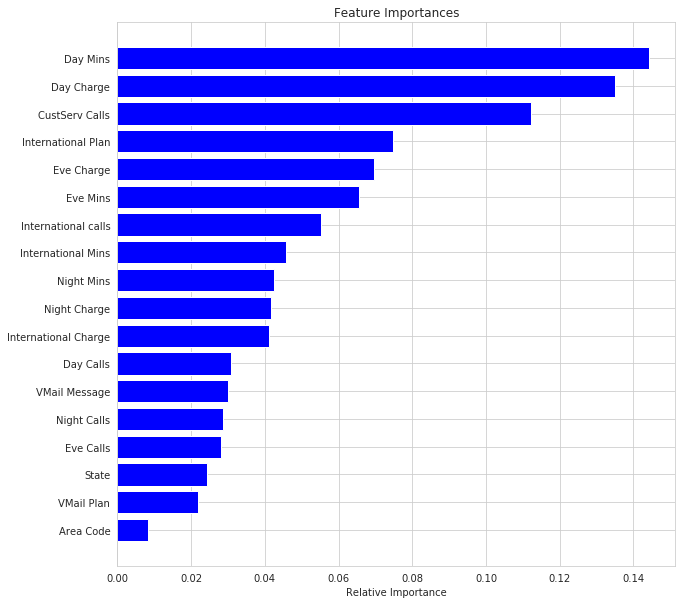

In [60]:
rfc.fit(x_train,y_train) #training the model
features=x.columns
importances = rfc.feature_importances_ #taking the feature importance values into the a variable
indices = np.argsort(importances)
plt.figure(figsize=(10,10)) #plotting these in to a horizontal barplot
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [0]:
Churn_Flag=rfc.predict(x_test) #getting the Predictions

In [62]:
# Here we are checking the Classfication report ,Confusion matrix and accuracy score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,Churn_Flag))
print(confusion_matrix(y_test,Churn_Flag))
print(accuracy_score(y_test,Churn_Flag))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       782
           1       0.97      0.78      0.86       142

    accuracy                           0.96       924
   macro avg       0.96      0.89      0.92       924
weighted avg       0.96      0.96      0.96       924

[[778   4]
 [ 31 111]]
0.9621212121212122


# Building a Deep Learning Model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [64]:
x_train.shape

(3692, 18)

In [65]:
x_test.shape

(924, 18)

In [75]:
y_train.shape

(3692, 2)

In [76]:
y_test.shape

(924, 2)

In [0]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [0]:
churn_model = Sequential()

In [84]:
# Input layer
churn_model.add(Dense(64,kernel_initializer='normal',activation ='softmax',input_shape=(18,)))
# Hidden layer
churn_model.add(Dense(256,kernel_initializer='normal', activation ='softmax'))
churn_model.add(Dropout(0.1))
churn_model.add(Dense(128,kernel_initializer='normal', activation ='softmax'))
churn_model.add(Dropout(0.1))
churn_model.add(Dense(256,kernel_initializer='normal', activation ='softmax'))
churn_model.add(Dropout(0.1))
# Output layer
churn_model.add(Dense(2, kernel_initializer='normal',activation='softmax'))
# Compile
churn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
# Summary
churn_model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                1216      
_________________________________________________________________
dense_33 (Dense)             (None, 256)               16640     
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)              

In [86]:
# Trying the function
m=churn_model.fit(x_train,y_train,batch_size=16,epochs=10,verbose=1,validation_split=0.2)

Train on 2953 samples, validate on 739 samples
Epoch 1/10
2953/2953 [==============================] - 1s 476us/step - loss: 0.4028 - acc: 0.8615 - val_loss: 0.4087 - val_acc: 0.8579
Epoch 2/10
2953/2953 [==============================] - 1s 493us/step - loss: 0.4021 - acc: 0.8615 - val_loss: 0.4087 - val_acc: 0.8579
Epoch 3/10
2953/2953 [==============================] - 1s 477us/step - loss: 0.4023 - acc: 0.8615 - val_loss: 0.4088 - val_acc: 0.8579
Epoch 4/10
2953/2953 [==============================] - 1s 464us/step - loss: 0.4022 - acc: 0.8615 - val_loss: 0.4088 - val_acc: 0.8579
Epoch 5/10
2953/2953 [==============================] - 1s 485us/step - loss: 0.4026 - acc: 0.8615 - val_loss: 0.4088 - val_acc: 0.8579
Epoch 6/10
2953/2953 [==============================] - 1s 491us/step - loss: 0.4024 - acc: 0.8615 - val_loss: 0.4088 - val_acc: 0.8579
Epoch 7/10
2953/2953 [==============================] - 1s 503us/step - loss: 0.4026 - acc: 0.8615 - val_loss: 0.4088 - val_acc: 0.8579
E

# Conclusion

we conclude the project by summarizing the goals reached as per the requrirement of the project
1. First goal is to understand the variables that influence the customers to migrate.
    --If we check the flow of the people that want to migrate the most influencing factors are Day charge and Customer service as you can see people mostly depend on the cost high is always a no and you can see that in the Day charge graph in the plot
    --For customer service calls as number of calls increase you can see that more people are leaving as they are not satisfied with the service provided.
    --Another influence factor is the International plan as it takes a different cost charge and call time than the regular calls as the data is given as such so it induces a different Charge and more of the international plan yes people are migrating
 4.Created a predicted model with a accuracy score of 96 for predicting whether churn_Flag is yes or no